# AIWR ASSIGNMENT-2

<p>
Netflix is all about connecting people to the movies they love. To help customers find those movies, they developed world-class movie recommendation system: Its job is to predict whether someone will enjoy a movie based on how much they liked or disliked other movies. Netflix use those predictions to make personal movie recommendations based on each customer’s unique tastes.
<p>

# Dataset 

<ul>
<li> https://www.kaggle.com/datasets/shivamb/netflix-shows</li>

</ul>


<h3>Sanjana Pai     PES1UG20CS309</h3>



# Exploratory Data Analysis(EDA)

<h3>PREPROCESSING</h3>

In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
from pandas import DataFrame
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_theme(style="darkgrid")


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/netflix-shows/netflix_titles.csv


In [76]:
# Reading the csv file
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df4=df


In [3]:
df.head() # Displays the entire dataset. 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.columns # Gives all the column.

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<h3>Checking NaN values:</h3>

In [5]:
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  6


In [6]:
# Calculate missing value and their percentage for each column
def missing_pct(df):
    missing_count_percent = df.isnull().sum() * 100 / df.shape[0]
    df_missing_count_percent = pd.DataFrame(missing_count_percent).round(2)
    df_missing_count_percent = df_missing_count_percent.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_Percentage (%)'
                    }
                )
    df_missing_value = df.isnull().sum()
    df_missing_value = df_missing_value.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_value_count'
                    }
                )
    # Sort the data frame
    #df_missing = df_missing.sort_values('Missing_Percentage (%)', ascending=False)
    Final = df_missing_value.merge(df_missing_count_percent, how = 'inner', left_on = 'Column', right_on = 'Column')
    Final = Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    return Final

missing_pct(df)

,Column,Missing_value_count,Missing_Percentage (%)
3,director,2634,29.91
5,country,831,9.44
4,cast,825,9.37
6,date_added,10,0.11
8,rating,4,0.05
9,duration,3,0.03
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
7,release_year,0,0.00


In [7]:
# Filling the null values with mode for the numeric column and then the columns with string is filled with NULL
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['country'].mode()[0])
df['duration'] = df['duration'].fillna('0 min')
df['cast'] = df['cast'].fillna('NULL')
df['director'] = df['director'].fillna('NULL')


In [8]:
# Checking is any Missing data in each column of the dataset.
df.isna().sum()
df3=df

<h3>Checking Duplicate values:</h3>

In [9]:
# Checking for any dupicate values.
dup_bool = df.duplicated(['title','country','type','release_year','show_id'])
df[dup_bool]
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


<h3>Distribution of Contents:</h3>

based on ratings

In [10]:
z = df.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating',
title='Distribution of Content Ratings on Netflix',color_discrete_sequence=px.colors.sequential.RdBu)
pieChart.show()

<h2> DATA MANIPULATION</h2>

<ul>Adding some new columns:

Year Added - y_add,
Month Added - m_add,
Princial Country - country_main,
Target Age Groups - target_age</ul>

In [11]:
# Adding a new column y_add using lamba function.
df['y_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['y_add'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: y_add, dtype: object

In [12]:
# Adding a new column m_add using lamba function.
df['m_add'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['m_add'].head()

0    September
1    September
2    September
3    September
4    September
Name: m_add, dtype: object

In [13]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_age'] = df['rating'].replace(ratings_ages)

In [14]:
# Adding a new column country_main which tells the main country the content is being watched using lamba function.
df['country_main'] = df['country'].apply(lambda x: x.split(",")[0])
df['country_main'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: country_main, dtype: object

<ul>Making two new dataframes, one with movies collection and other with TV shows collection:
<li>
movie_df,
tv_df</li></ul>

In [15]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [16]:
movie_df.head() #Describes the movies dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,y_add,m_add,target_age,country_main
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NULL,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Teens,United States
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,Older Kids,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,September,Adults,United States
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,September,Teens,United States
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,September,Adults,Germany


<h2>Data Visualization</h2>

<h3>Percentage of Movies and TV show</h3>

In [17]:
x = df['type'].value_counts().reset_index()
plot = px.pie(x,values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
plot.update_traces(textposition='inside', textinfo='percent+label',marker = dict(line = dict(color = 'white', width = 1)))

<h3>Categorization based upon other factors:</h3>

In [18]:
country_df = df['country_main'].value_counts().reset_index()
country_df = country_df[country_df['country_main'] /  country_df['country_main'].sum() > 0.01]
ptx = px.pie(country_df, values='country_main', names='index',color_discrete_sequence=px.colors.sequential.RdBu)
ptx.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 1)))
ptx.show()

<h3> Year wise analysis of Movie and TV show</h3>

In [19]:
def generate_df(df):
    new_df = df.groupby(['y_add', 'm_add']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['y_add', 'm_add', 'counts']
    new_df = new_df.sort_values('y_add')
    return new_df

In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

movie_new_df = generate_df(movie_df)
tv_new_df = generate_df(tv_df)

plot = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
plot.add_trace(
    go.Pie(labels=movie_new_df['y_add'], values=movie_new_df['counts']),
    row=1, col=1
)

plot.add_trace(
    go.Pie(labels=tv_new_df['y_add'], values=tv_new_df['counts']),
    row=1, col=2
)

plot.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name",
                  marker = dict(line = dict(color = 'white', width = 2)))

plot.update_layout(
    title_text="Content distribution by Year of Adding",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.18, y=0.5, font_size=17, showarrow=False, font_color='black'),
                 dict(text='TV Shows', x=0.83, y=0.5, font_size=17, showarrow=False, font_color='black')])
plot.show()

<h3>Depicting the percentage of TV series and Movies originating from a country.</h3>

In [21]:
def generate_country_df(df):
    new_df = df.groupby(['country_main']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['country_main', 'counts']
    new_df = new_df.sort_values('country_main')
    return new_df

In [22]:
tv_country_df = generate_country_df(tv_df)
plot = px.pie(labels = tv_country_df['country_main'], values = tv_country_df['counts'], names = tv_country_df['country_main'], width = 550, height = 550
            ,color_discrete_sequence=px.colors.sequential.RdBu)

plot.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(line = dict(color = 'white', width = 2)))

plot.update_layout(annotations = [dict(text = 'TV Series', 
                                      x = 0.5, y = 0.5, font_size = 40, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

plot.show()
movie_country_df = generate_country_df(movie_df)
plot = px.pie(labels = movie_country_df['country_main'], values = movie_country_df['counts'], names = movie_country_df['country_main'], width = 550, height = 550
             ,color_discrete_sequence=px.colors.sequential.RdBu)

plot.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(line = dict(color = 'white', width = 2)))
                                

plot.update_layout(annotations = [dict(text = 'Movies', 
                                      x = 0.5, y = 0.5, font_size = 32, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

plot.show()

<h3>Number of shows countrywise</h3>

Country column in dataset contains the countries in which the show was released.
Count the number show released in particular country.
Arranged in ascending order.
Displaying the data in bar graph.

In [23]:
country=df["country"]
country=country.dropna()

country=", ".join(country)
country=country.replace(',, ',', ')


country=country.split(", ")
country= list(Counter(country).items())
country.remove(('Vatican City', 1))
country.remove(('East Germany', 1))
print(country)

[('United States', 4521), ('South Africa', 62), ('India', 1046), ('Ghana', 5), ('Burkina Faso', 1), ('United Kingdom', 806), ('Germany', 226), ('Ethiopia', 1), ('Czech Republic', 22), ('Mexico', 169), ('Turkey', 113), ('Australia', 160), ('France', 393), ('Finland', 11), ('China', 162), ('Canada', 445), ('Japan', 318), ('Nigeria', 103), ('Spain', 232), ('Belgium', 90), ('South Korea', 231), ('Singapore', 41), ('Italy', 100), ('Romania', 14), ('Argentina', 91), ('Venezuela', 4), ('Hong Kong', 105), ('Russia', 27), ('', 2), ('Ireland', 46), ('Nepal', 2), ('New Zealand', 33), ('Brazil', 97), ('Greece', 11), ('Jordan', 9), ('Colombia', 52), ('Switzerland', 19), ('Israel', 30), ('Taiwan', 89), ('Bulgaria', 10), ('Algeria', 3), ('Poland', 41), ('Saudi Arabia', 13), ('Thailand', 70), ('Indonesia', 90), ('Egypt', 117), ('Denmark', 48), ('Kuwait', 8), ('Netherlands', 50), ('Malaysia', 26), ('Vietnam', 7), ('Hungary', 11), ('Sweden', 42), ('Lebanon', 31), ('Syria', 3), ('Philippines', 83), ('Ice

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



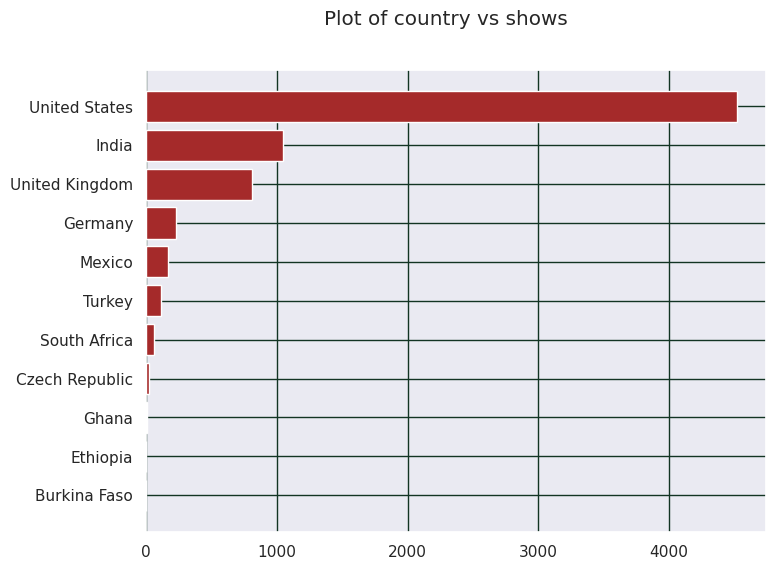

In [24]:
max_show_country=country[0:11]
max_show_country = pd.DataFrame(max_show_country) 
max_show_country= max_show_country.sort_values(1)

plot, ax = plt.subplots(1, figsize=(8, 6))
plot.suptitle('Plot of country vs shows')
ax.barh(max_show_country[0],max_show_country[1],color='brown')
plt.grid(b=True, which='major', color='#123423', linestyle='-')

plt.show()

<h3>Based upon the duration of Movies</h3>

In [25]:
def generate_duration_df(df):
    new_df = df.groupby(['duration']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['duration', 'counts']
    new_df = new_df.sort_values('duration')

    return new_df

In [26]:
new_movie_df = generate_duration_df(movie_df)
plot = px.bar(x=new_movie_df['duration'], y = new_movie_df['counts'])
plot.update_traces(marker = dict(color= 'green'))

plot.update_xaxes(type='category',categoryorder='total descending')

plot.show()

<h3>Based upon the seasons of TV series</h3>

In [27]:
new_tv_df = generate_duration_df(tv_df)
plot = px.bar(x=new_tv_df['duration'], y = new_tv_df['counts'])
plot.update_traces(marker = dict(color= '#E55451'))
plot.update_xaxes(type='category',categoryorder='total descending')
plot.show()


<h3>Grouped the shows and movies on basis of Genre</h3>

[('Documentaries', 869), ('International TV Shows', 1351), ('TV Dramas', 763), ('TV Mysteries', 98), ('Crime TV Shows', 470), ('TV Action & Adventure', 168), ('Docuseries', 395), ('Reality TV', 255), ('Romantic TV Shows', 370), ('TV Comedies', 581), ('TV Horror', 75), ('Children & Family Movies', 641), ('Dramas', 2427), ('Independent Movies', 756), ('International Movies', 2752), ('British TV Shows', 253), ('Comedies', 1674), ('Spanish-Language TV Shows', 174), ('Thrillers', 577), ('Romantic Movies', 616), ('Music & Musicals', 375), ('Horror Movies', 357), ('Sci-Fi & Fantasy', 243), ('TV Thrillers', 57), ("Kids' TV", 451), ('Action & Adventure', 859), ('TV Sci-Fi & Fantasy', 84), ('Classic Movies', 116), ('Anime Features', 71), ('Sports Movies', 219), ('Anime Series', 176), ('Korean TV Shows', 151), ('Science & Nature TV', 92), ('Teen TV Shows', 69), ('Cult Movies', 71), ('TV Shows', 16), ('Faith & Spirituality', 65), ('LGBTQ Movies', 102), ('Stand-Up Comedy', 343), ('Movies', 57), ('S

<BarContainer object of 11 artists>

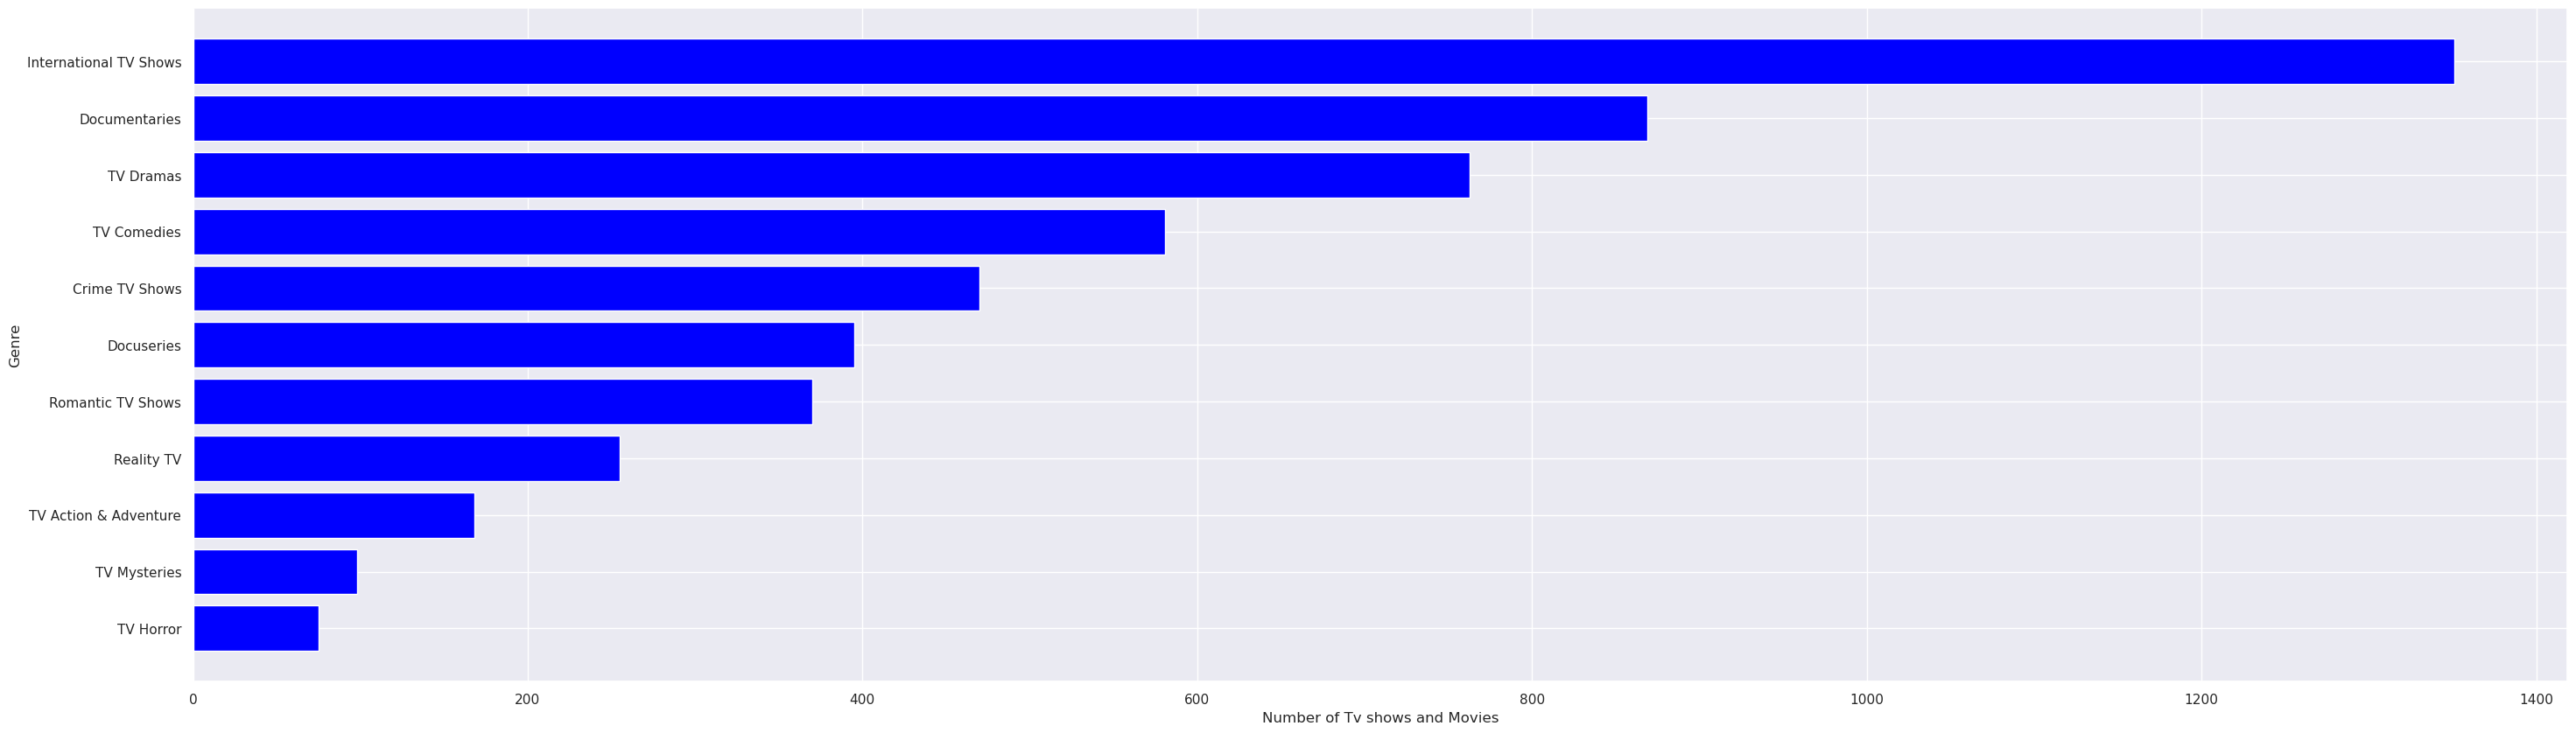

In [28]:
grouped_genre=df["listed_in"]
grouped_genre=", ".join(grouped_genre)
grouped_genre=grouped_genre.replace(',, ',', ')
grouped_genre=grouped_genre.split(", ")
grouped_genre= list(Counter(grouped_genre).items())
print(grouped_genre)

max=grouped_genre[0:11]
max = pd.DataFrame(max) 
max= max.sort_values(1)

plt.figure(figsize=(35,10))
plt.xlabel('Number of Tv shows and Movies')
plt.ylabel('Genre')
plt.barh(max[0],max[1], color='blue')

# EVALUATION METRIC

<h3>Heat map of the number of Tv Shows added between the year and the month</h3> 

In [99]:
df.head()
df5=df

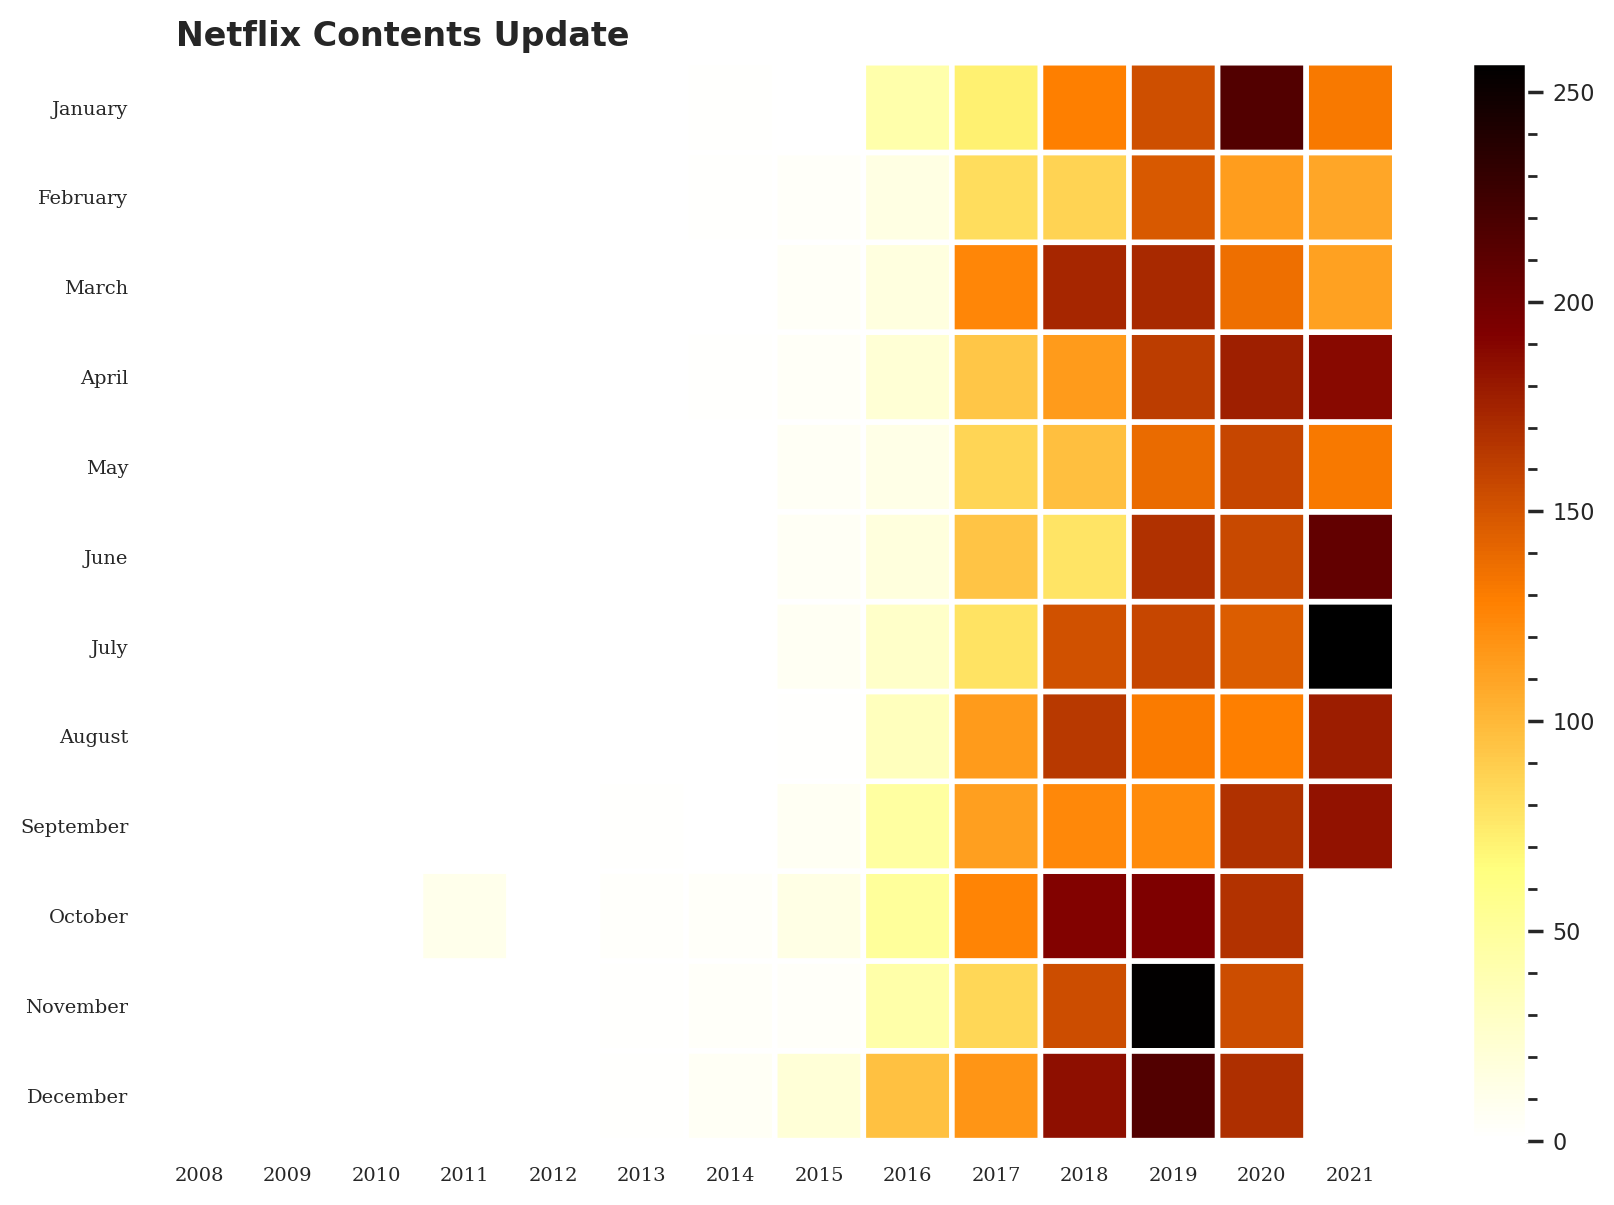

In [30]:
netflix_date = df
netflix_date['year'] = df['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = df['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df1 = df.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df1, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df1.columns), 1), df1.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df1.index), 1), df1.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

ANALYSIS ON DURATION FOR MOVIES

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




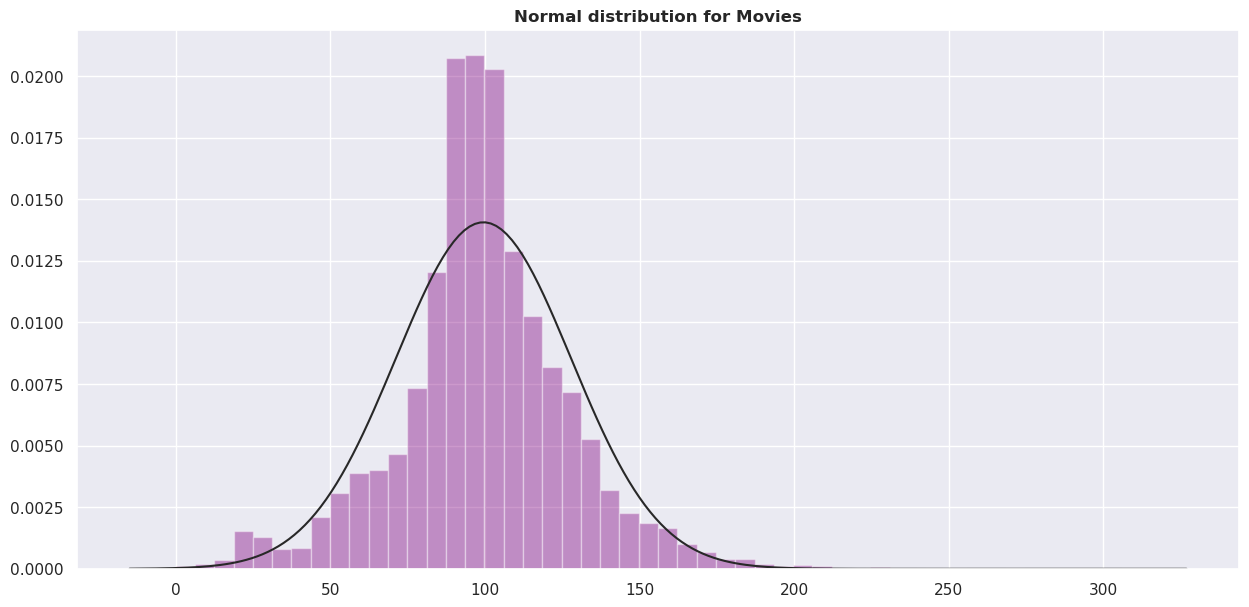

In [31]:
from scipy.stats import norm
plt.figure(figsize=(15,7))
sns.distplot(movie_df['duration'].str.extract('(\d+)'),fit=norm,kde=False, color=['Purple'])
plt.title('Normal distribution for Movies',fontweight="bold")
plt.show()

FUNNEL CHART

A funnel is a type of chart that shows progress through a series of linear and interconnected stages in which the data values typically decrease. One of the most common uses is in marketing and sales to show how the number of potential sales prospects gradually winnows to those who complete purchases.

Funnel charts are often used to represent data in different stages of a business process. It’s an important mechanism in Business Intelligence to identify potential problem areas of a process. For example, it’s used to observe the revenue or loss in a sales process for each stage, and displays values that are decreasing progressively. Each stage is illustrated as a percentage of the total of all values.

In [32]:
fig = go.Figure(go.Funnel(
    y = ["United States", "India", "United Kingdom", "Japan"],
    x = [2818,972,419,245],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["firebrick", "lightsalmon", "tan", "teal"],
    "line": {"width": [5, 5, 4,4,3,3], "color": ["wheat", "wheat", "blue", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()

TREE MAP

Treemaps are visualizations for hierarchical data. They are made of a series of nested rectangles of sizes proportional to the corresponding data value. A large rectangle represents a branch of a data tree, and it is subdivided into smaller rectangles that represent the size of each node within that branch.

In [33]:
netflix_Turkey=df[df['country']=='Turkey']
nannef=netflix_Turkey.dropna()

fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','type'],color_continuous_scale='Purples')
fig.show()

In [34]:
!pip install scikit-surprise

In [35]:
!pip install recmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 79.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.0
    Uninstalling plotly-5.13.0:
      Successfully uninstalled plotly-5.13.0
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
import recmetrics

In [77]:
df4.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [83]:
ratings = df4.query('release_year >=2020')
ratings.reset_index(drop=True, inplace=True)

<h3>Format data for Surprise<h3>

In [101]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(movie_df[['show_id', 'type','y_add' ]], reader)
trainset, testset = train_test_split(data, test_size=0.25)

<h3>Train SVD Recommender<h3>

In [102]:
algo = SVD()
algo.fit(trainset)

<h3>Make predictions on SVD test set<h3>

In [103]:
test = algo.test(testset)
test = pd.DataFrame(test)
test.drop("details", inplace=True, axis=1)
test.columns = ['show_id', 'type', 'year', 'cf_predictions']
test.head()

,show_id,type,year,cf_predictions
0,s1325,Movie,2021.0,5
1,s8160,Movie,2020.0,5
2,s1216,Movie,2021.0,5
3,s163,Movie,2021.0,5
4,s4062,Movie,2019.0,5


Evaluate model with MSE and RMSE

In [105]:
print("MSE: ", recmetrics.mse(test.year, test.cf_predictions))
print("RMSE: ", recmetrics.rmse(test.year, test.cf_predictions))

MSE:  4055783.25766471
RMSE:  2013.897529087493


In [106]:
#create model (matrix of predicted values)
cf_model = test.pivot_table(index='show_id', columns='year', values='cf_predictions').fillna(0)

In [107]:
def get_users_predictions(user_id, n, model):
    recommended_items = pd.DataFrame(model.loc[user_id])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)    
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

In [109]:
test = test.copy().groupby('show_id', as_index=False)['type'].agg({'year': (lambda x: list(set(x)))})

In [110]:
test = test.set_index("show_id")

In [111]:
# make recommendations for all members in the test data
cf_recs = [] = []
for user in test.index:
    cf_predictions = get_users_predictions(user, 10, cf_model)
    cf_recs.append(cf_predictions)
        
test['cf_predictions'] = cf_recs
test.head()

,year,cf_predictions
show_id,,
s1,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015...."
s1006,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015...."
s1011,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015...."
s1017,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015...."
s1027,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015...."


<h3>Popularity Recommender<h3>

In [114]:
#make recommendations for all members in the test data
popularity_recs = movie_df.show_id.value_counts().head(10).index.tolist()

pop_recs = []
for user in test.index:
    pop_predictions = popularity_recs
    pop_recs.append(pop_predictions)
        
test['pop_predictions'] = pop_recs
test.head()

,year,cf_predictions,pop_predictions
show_id,,,
s1,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015....","[s1, s6221, s6231, s6230, s6228, s6227, s6226,..."
s1006,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015....","[s1, s6221, s6231, s6230, s6228, s6227, s6226,..."
s1011,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015....","[s1, s6221, s6231, s6230, s6228, s6227, s6226,..."
s1017,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015....","[s1, s6221, s6231, s6230, s6228, s6227, s6226,..."
s1027,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015....","[s1, s6221, s6231, s6230, s6228, s6227, s6226,..."


<h3>Random Recommender<h3>

In [115]:
#make recommendations for all members in the test data

ran_recs = []
for user in test.index:
    random_predictions = movie_df.show_id.sample(10).values.tolist()
    ran_recs.append(random_predictions)
        
test['random_predictions'] = ran_recs
test.head()

,year,cf_predictions,pop_predictions,random_predictions
show_id,,,,
s1,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015....","[s1, s6221, s6231, s6230, s6228, s6227, s6226,...","[s6912, s3110, s6582, s7533, s4747, s2419, s25..."
s1006,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015....","[s1, s6221, s6231, s6230, s6228, s6227, s6226,...","[s3262, s6356, s575, s305, s4358, s6658, s7400..."
s1011,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015....","[s1, s6221, s6231, s6230, s6228, s6227, s6226,...","[s3539, s2616, s6723, s8681, s4594, s5283, s52..."
s1017,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015....","[s1, s6221, s6231, s6230, s6228, s6227, s6226,...","[s5838, s6820, s4049, s4342, s4253, s4983, s61..."
s1027,[Movie],"[2021.0, 2009.0, 2011.0, 2012.0, 2014.0, 2015....","[s1, s6221, s6231, s6230, s6228, s6227, s6226,...","[s3892, s7195, s5991, s1704, s3810, s6283, s31..."


<h3>Recall<h3>

In [120]:
year = test.year.values.tolist()
cf_predictions = test.cf_predictions.values.tolist()
pop_predictions = test.pop_predictions.values.tolist()
random_predictions = test.random_predictions.values.tolist()

<h3>Mark Plot<h3>

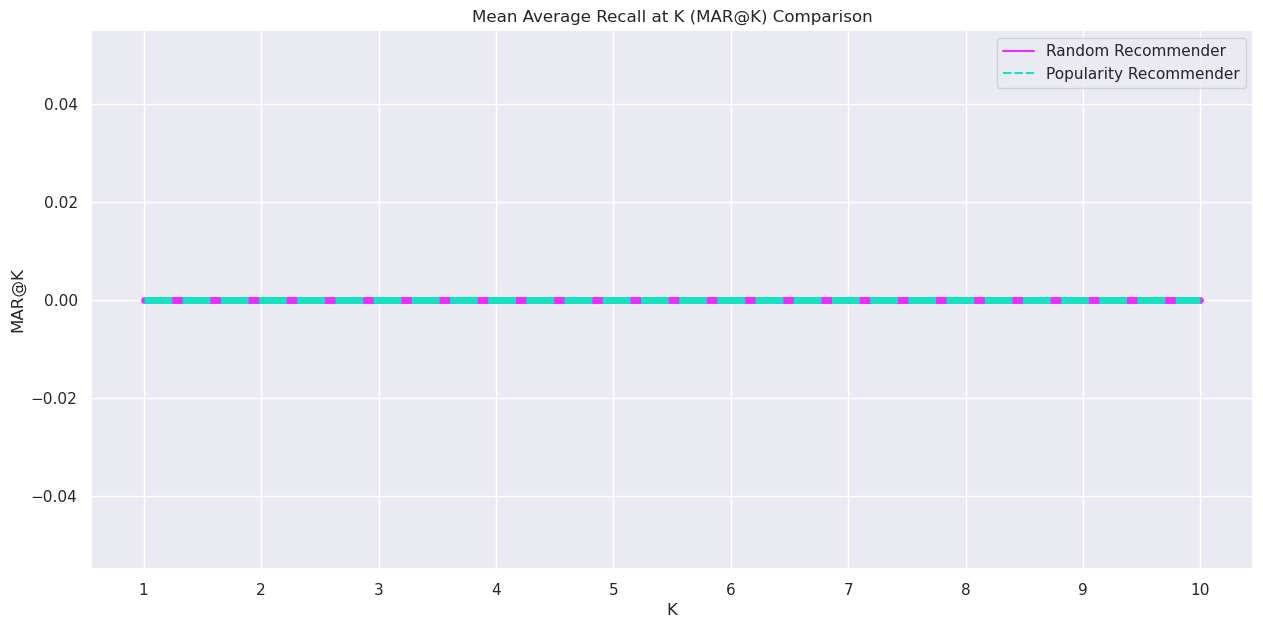

In [124]:
mark_scores = [random_mark, pop_mark]
index = range(1,10+1)
names = ['Random Recommender', 'Popularity Recommender']

fig = plt.figure(figsize=(15, 7))
recmetrics.mark_plot(mark_scores, model_names=names, k_range=index)

<h3>Classification Probability Plot<h3>|

In [85]:
#make fake classification probability data
class_one_probs = np.random.normal(loc=.7, scale=0.1, size=1000)
class_zero_probs = np.random.normal(loc=.3, scale=0.1, size=1000)
actual = [1] * 1000
class_zero_actual = [0] * 1000
actual.extend(class_zero_actual)

pred_df = pd.DataFrame([np.concatenate((class_one_probs, class_zero_probs), axis=None), actual]).T
pred_df.columns = ["predicted", "truth"]
pred_df.head()

,predicted,truth
0,0.652719,1.0
1,0.675900,1.0
2,0.698545,1.0
3,0.805833,1.0
4,0.768318,1.0


/opt/conda/lib/python3.7/site-packages/recmetrics/plots.py:267: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/lib/python3.7/site-packages/recmetrics/plots.py:267: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




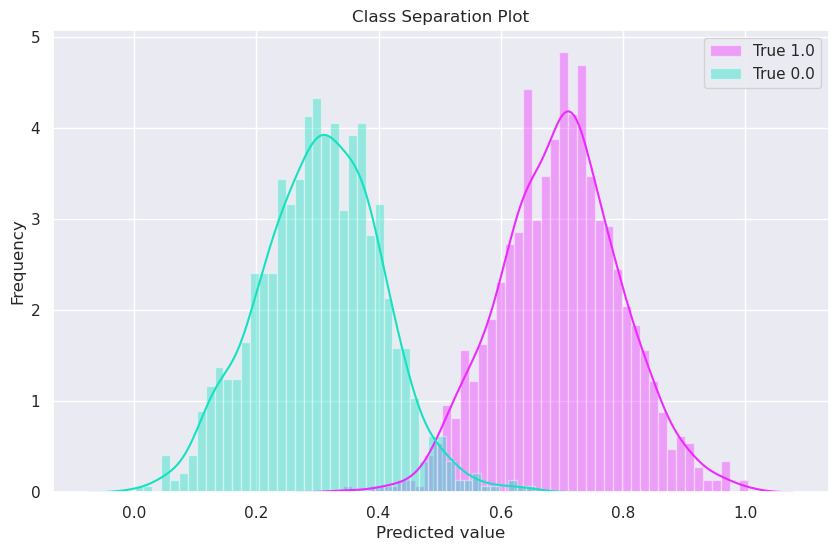

In [86]:
recmetrics.class_separation_plot(pred_df, n_bins=45, title="Class Separation Plot")

<h3>ROC Plot<h3>

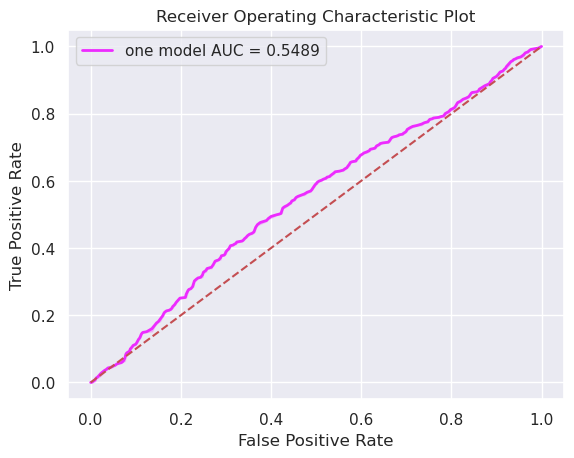

In [127]:
model_probs = np.concatenate([np.random.normal(loc=.7, scale=0.5, size=500), np.random.normal(loc=.8, scale=0.5, size=500)])
actual = [0] * 500
class_zero_actual = [1] * 500
actual.extend(class_zero_actual)

recmetrics.roc_plot(actual, model_probs, model_names="one model",  figsize=(10, 5))

<h3>Precision Recall Curve<h3>

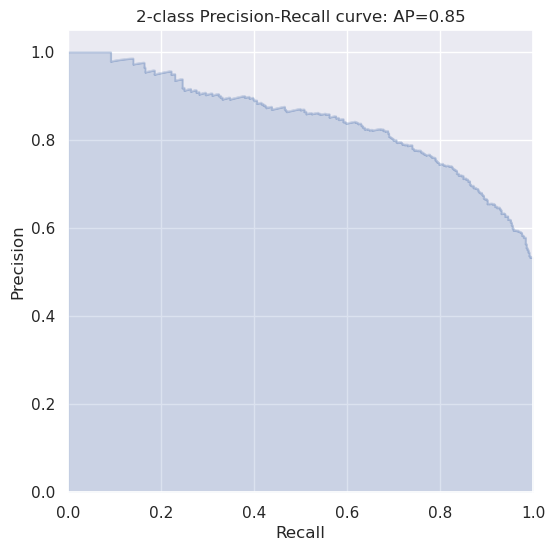

In [88]:
recmetrics.precision_recall_plot(targs=actual, preds=model_probs)

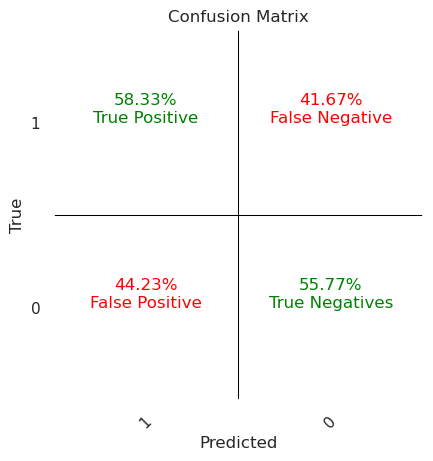

In [89]:
y_confusion_matrix = [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
                      0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
                      1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
                      1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
                      1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1]

yhat_confusion_matrix = [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
                         0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
                         1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
                         1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
                         1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]


recmetrics.make_confusion_matrix(y=y_confusion_matrix, yhat=yhat_confusion_matrix)

<h3>Create Metrics Plot<h3>

Plot the coverage, personalization, and intra-list similarity for a set of models to compare.

In [91]:
recmetrics.metrics_plot(model_names=['Model A', 'Model B', 'Model C'],
             coverage_scores=[0.45, 0.25, 0.30],
             personalization_scores=[0.26, 0.41, 0.33],
             intra_list_similarity_scores = [0.23, 0.21, 0.69])

RECOMMENDATION SYSTEMS

In [37]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,y_add,m_add,target_age,country_main,year,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NULL,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Teens,United States,2021,September
1,s2,TV Show,Blood & Water,NULL,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Adults,South Africa,2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Adults,United States,2021,September
3,s4,TV Show,Jailbirds New Orleans,NULL,NULL,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,Adults,United States,2021,September
4,s5,TV Show,Kota Factory,NULL,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,Adults,India,2021,September


# CONTENT BASED RECOMMENDATION

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')


In [39]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8807, 18895)

In [40]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [41]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
indices

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

In [42]:
features=['title', 'director','cast','listed_in', 'description']
df_features = df[features]

In [43]:
def combined_features(x):
    return x['title'] + ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [44]:

df_features['combined_features'] = df_features.apply(combined_features, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_features['combined_features'])

In [46]:
# Compute the Cosine Similarity matrix based on the count_matrix
# 0 means no similarity, where as 1 means that both the items are 100% similar.
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix)

In [47]:
#Construct a reverse map of indices and movie titles
df_features = df_features.reset_index()
indices = pd.Series(df_features.index, index=df_features['title']).drop_duplicates()
indices

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

In [48]:
def recommendations_title(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [49]:
recommendations_title('The Conjuring', cosine_sim2)

1284                                  The Conjuring 2
1118                                        Insidious
3450                                In the Tall Grass
5903                                            Creep
5359                                  Raising the Bar
5737    I Am the Pretty Thing That Lives in the House
4872                                     Family Blood
7168                                           Kanika
5110                                          Creep 2
5042                                       The Ritual
Name: title, dtype: object

In [50]:
recommendations_title('#Alive', cosine_sim2)

4211               Nang Nak
5317        Berlin Syndrome
2729                   Kaal
2589                 Psycho
7280                 Lechmi
1783    The Day of the Lord
1898            The Binding
7168                 Kanika
3698           Inhuman Kiss
5042             The Ritual
Name: title, dtype: object

In [51]:
recommendations_title('High & Low The Movie', cosine_sim2)

1969                                  Road To High & Low
1965                 High & Low The Movie 2 / End of Sky
1966              High & Low The Movie 3 / Final Mission
1968                                High & Low The Worst
1967                             High & Low The Red Rain
61      Naruto the Movie 2: Legend of the Stone of Gelel
56              Naruto Shippuden the Movie: Blood Prison
3842                           Gatao 2: Rise of the King
4559                                              Anjaan
5293        Berserk: The Golden Age Arc III - The Advent
Name: title, dtype: object

In [52]:
recommendations_title('Squid Game', cosine_sim2)

5065                    Prison Playbook
3288                     Chief of Staff
731     Love (ft. Marriage and Divorce)
686                   Hospital Playlist
3928                            Persona
5665                     Color of Woman
4132            Romance is a bonus book
1528                             Run On
3610                          Let’s Eat
3473                             The K2
Name: title, dtype: object

In [53]:
recommendations_title('Stranger Things', cosine_sim2)


5200         Beyond Stranger Things
2190           The Umbrella Academy
8803                    Zombie Dumb
2303                    Warrior Nun
880                         Haunted
1127               Prank Encounters
3187                    Nightflyers
6167    Anjaan: Special Crimes Unit
241                        Manifest
1335                     The Sinner
Name: title, dtype: object

In [54]:
recommendations_title('13 Reasons Why', cosine_sim2)

3561    13 Reasons Why: Beyond the Reasons
3604                              Sintonia
6841                            Get Shorty
7991                       Shadow of Truth
1335                            The Sinner
3789                        Killer Ratings
4508                         Stunt Science
5457                             Mind Game
5038                               Re:Mind
3937                             Imposters
Name: title, dtype: object

In [55]:
recommendations_title('PK', cosine_sim2)

1114            3 Idiots
3131      Dil Chahta Hai
1022    Taare Zameen Par
4507               Sanju
7119              Janaan
5718     Mumbai Cha Raja
7590            No Entry
1441       Hello Brother
1019              Lagaan
3132     Dil Dhadakne Do
Name: title, dtype: object

In [56]:
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n] 

# Hybrid Recommendation System

The Mini-batch K-means clustering algorithm is a version of the standard K-means algorithm in machine learning. It uses small, random, fixed-size batches of data to store in memory, and then with each iteration, a random sample of the data is collected and used to update the clusters.

Each iteration a new random sample from the dataset is obtained and used to update the clusters and this is repeated until convergence.

In [57]:
df1=df
df1["date_added"] = pd.to_datetime(df['date_added'])
df1['directors'] = df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df1['categories'] = df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df1['actors'] = df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df1['countries'] = df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

In [58]:
# Build the tfidf matrix with the descriptions
import time
start_time = time.time()
text_content = df1['description']
vector = TfidfVectorizer(max_df=0.4,         # drop words that occur in more than X percent of documents
                             min_df=1,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )
tfidf = vector.fit_transform(text_content)

In [59]:

from sklearn.cluster import MiniBatchKMeans# Clustering  Kmeans
k = 200
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()
request_transform = vector.transform(df1['description'])
# new column cluster based on the description
df1['cluster'] = kmeans.predict(request_transform) 
df1['cluster'].value_counts().head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



38     7801
137     322
95      259
49      153
64       80
Name: cluster, dtype: int64

In [60]:
import networkx as nx
P = nx.Graph(label="MOVIE")
start_time = time.time()
for i, rowi in df1.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    P.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])
    P.add_node(rowi['cluster'],label="CLUSTER")
    P.add_edge(rowi['title'], rowi['cluster'], label="DESCRIPTION")
    for element in rowi['actors']:
        P.add_node(element,label="PERSON")
        P.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['categories']:
        P.add_node(element,label="CAT")
        P.add_edge(rowi['title'], element, label="CAT_IN")
    for element in rowi['directors']:
        P.add_node(element,label="PERSON")
        P.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['countries']:
        P.add_node(element,label="COU")
        P.add_edge(rowi['title'], element, label="COU_IN")
    indices = find_similar(tfidf, i, top_n = 5)
    snode="Sim("+rowi['title'][:15].strip()+")"        
    P.add_node(snode,label="SIMILAR")
    P.add_edge(rowi['title'], snode, label="SIMILARITY")
    for element in indices:
        P.add_edge(snode, df1['title'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time))     

 iter 0 -- 0.03528141975402832 seconds --
 iter 1000 -- 4.559150695800781 seconds --
 iter 2000 -- 9.441274881362915 seconds --
 iter 3000 -- 13.98111867904663 seconds --
 iter 4000 -- 18.532042980194092 seconds --
 iter 5000 -- 23.261890411376953 seconds --
 iter 6000 -- 28.24141788482666 seconds --
 iter 7000 -- 32.8312201499939 seconds --
 iter 8000 -- 37.42252469062805 seconds --
 finish -- 41.143157958984375 seconds --


In [61]:
import math
def get_recommendation(root):
    commons_dict = {}
    for h in P.neighbors(root):
        for h2 in P.neighbors(h):
            if h2==root:
                continue
            if P.nodes[h2]['label']=="MOVIE":
                commons = commons_dict.get(h2)
                if commons==None:
                    commons_dict.update({h2 : [h]})
                else:
                    commons.append(h)
                    commons_dict.update({h2 : commons})
    movies=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for h in values:
            w=w+1/math.log(P.degree(h))
        movies.append(key) 
        weight.append(w)
    
    final = pd.Series(data=np.array(weight),index=movies)
    final.sort_values(inplace=True,ascending=False)        
    return final;


In [62]:
final1 = get_recommendation("PK")
final2 = get_recommendation("Ocean's Thirteen")
final3 = get_recommendation("The Devil Inside")
final4 = get_recommendation("Stranger Things")
print("*"*40+"\n Recommendation for 'PK\n"+"*"*40)
print(final1.head())
print("*"*40+"\n Recommendation for 'Ocean's Thirteen'\n"+"*"*40)
print(final2.head())

print("*"*40+"\n Recommendation for 'Stranger Things'\n"+"*"*40)
print(final4.head())

****************************************
 Recommendation for 'PK
****************************************
3 Idiots                 2.107430
Sanju                    1.723621
Merku Thodarchi Malai    1.626190
Drive                    1.595324
Chance Pe Dance          1.554925
dtype: float64
****************************************
 Recommendation for 'Ocean's Thirteen'
****************************************
Ocean's Twelve       6.319551
The Departed         2.321761
Ocean's Eleven       2.187467
Hostel: Part III     1.904728
Brooklyn's Finest    1.557668
dtype: float64
****************************************
 Recommendation for 'Stranger Things'
****************************************
Beyond Stranger Things     11.308808
Rowdy Rathore               2.758378
Safe Haven                  2.351257
Big Stone Gap               1.793146
The Autopsy of Jane Doe     1.793146
dtype: float64


In [63]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for q in list_in:
        sub_graph.add(q)
        for h in P.neighbors(q):        
                sub_graph.add(h)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = P.subgraph(sub_graph)
    colors=[]
    for h in subgraph.nodes():
        if P.nodes[h]['label']=="MOVIE":
            colors.append('blue')
        elif P.nodes[h]['label']=="PERSON":
            colors.append('red')
        elif P.nodes[h]['label']=="CAT":
            colors.append('green')
        elif P.nodes[h]['label']=="COU":
            colors.append('yellow')
        elif P.nodes[h]['label']=="SIMILAR":
            colors.append('orange')    
        elif P.nodes[h]['label']=="CLUSTER":
            colors.append('orange')
    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()

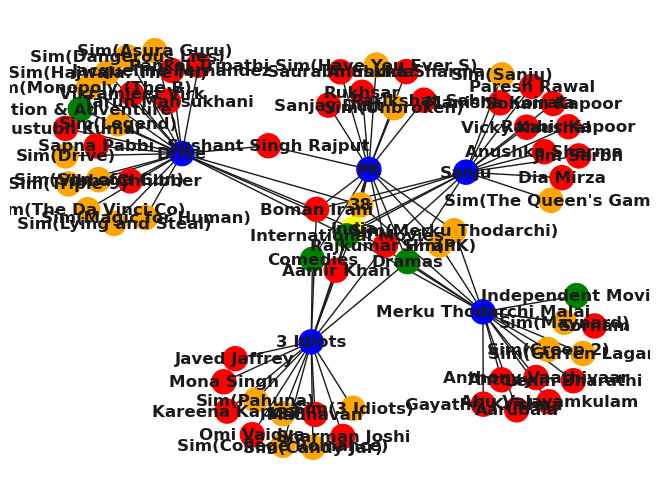

In [64]:
#visualizing the recommendation for "PK"
reco=list(final1.index[:4].values)
reco.extend(["PK"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)

# Collaberative Recommendation System

In [65]:
!pip install unidecode

In [66]:
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from numpy import random
import datetime
from numpy import dot
from numpy import random
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors  

In [67]:
df3.dropna(subset=['director','cast','country','rating'],axis=0,inplace=True)
df3.drop(['description'],axis=1,inplace=True)
print()
print("Details after dropping null rows and columns")
print("Total Rows: {}\nTotal Columns: {}".format(df3.shape[0],df3.shape[1]))

dfDatabase = df3.copy()

print()
print("Database Created")


Details after dropping null rows and columns
Total Rows: 8807
Total Columns: 22

Database Created


In [68]:
import unidecode
df3['cast'] = df3['cast'].apply(lambda x : unidecode.unidecode(x))

#df3['date_added'] = df3['date_added'].apply(lambda x : x[-4:])
df3['date_added'] = df3['date_added'].astype('int64')
df3['show_age'] = 2021 - df3['date_added']
df3['show_age'] = df3['show_age'].apply(lambda x : str(x)+" years")

dfVis = df3.copy()

df3.drop(['date_added','release_year'],axis=1,inplace=True)

print("Data Procesing Done")

Data Procesing Done


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



In [69]:
Begin = datetime.datetime.now()

userid = np.arange(1, 2000+1, 1)
userid = ["uid" + str(userid) for userid in userid]

usercols = df3['title'].unique()
userwatch = random.randint(5, size=(2000,len(usercols)))

watchhist = pd.DataFrame(userwatch,columns=usercols)
watchhist.insert(0,"user_id",userid)
watchhist = watchhist.set_index('user_id')
watchhist = watchhist.transpose()
watchhist.index.name = 'title'

watchhist.head()

user_id,uid1,uid2,uid3,uid4,uid5,uid6,uid7,uid8,uid9,uid10,...,uid1991,uid1992,uid1993,uid1994,uid1995,uid1996,uid1997,uid1998,uid1999,uid2000
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,2,0,2,1,4,1,4,1,3,1,...,2,0,0,1,0,1,4,3,1,1
Blood & Water,0,1,4,1,0,0,4,2,4,1,...,2,4,2,2,0,0,1,2,2,2
Ganglands,0,1,3,4,3,4,3,1,3,3,...,2,4,0,3,1,1,1,0,4,4
Jailbirds New Orleans,0,1,3,2,0,4,0,3,1,2,...,4,3,3,0,0,3,0,1,2,4
Kota Factory,1,1,2,2,3,1,0,4,0,1,...,1,2,3,4,1,2,0,1,3,4


In [70]:
sparselist = csr_matrix(watchhist.values)
watchhist.reset_index(inplace=True)

knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
knn.fit(sparselist)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [71]:
def collab_recommendation_system(title):
    
    try:
        row = watchhist[watchhist['title'] == title].index[0]

        distances , indices = knn.kneighbors(sparselist[row],n_neighbors=5+1) 
        indices = [l for m in indices.tolist() for l in m]
        distances = [l for m in distances.tolist() for l in m]

        recommendation = {}

        for i in range(1,len(indices)):
            movie_name = watchhist.iloc[indices[i]]['title']
            recommendation[movie_name] = distances[i]

        recommendation = {k: v for k, v in sorted(recommendation.items(), key=lambda item: item[1])}
        results = pd.DataFrame()

        for key,value in recommendation.items():
            row = dfDatabase[dfDatabase['title'] == key]
            results = results.append(row)

        return(results.iloc[1:,:-1])
        
    except:
        print("Incorrect Movie Title,try another one.")   

In [72]:
collab_recommendation_system("Rocky IV") 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,y_add,m_add,target_age,country_main,year,month,directors,categories,actors,countries
7542,s7543,Movie,My Little Pony Equestria Girls: Rainbow Rocks,"Jayson Thiessen, Ishi Rudell","Tara Strong, Ashleigh Ball, Andrea Libman, Tab...","United States, Canada",2014-12-17,2014,TV-Y,73 min,...,2014,December,Kids,United States,2014,December,"[Jayson Thiessen, Ishi Rudell]","[Children & Family Movies, Comedies]","[Tara Strong, Ashleigh Ball, Andrea Libman, Ta...","[United States, Canada]"
5623,s5624,Movie,Semana Santa,Alejandra Márquez Abella,"Tenoch Huerta, Anajosé Aldrete, Esteban Ávila,...",Mexico,2017-01-31,2015,TV-MA,87 min,...,2017,January,Adults,Mexico,2017,January,[Alejandra Márquez Abella],"[Dramas, International Movies]","[Tenoch Huerta, Anajosé Aldrete, Esteban Ávila...",[Mexico]
3469,s3470,Movie,Little Baby Bum: Go Buster,NULL,NULL,United States,2019-10-01,2019,TV-Y,58 min,...,2019,October,Kids,United States,2019,October,[NULL],[Children & Family Movies],[NULL],[United States]
5363,s5364,TV Show,The IT Crowd,NULL,"Chris O'Dowd, Richard Ayoade, Katherine Parkin...",United Kingdom,2017-08-01,2013,TV-MA,5 Seasons,...,2017,August,Adults,United Kingdom,2017,August,[NULL],"[British TV Shows, Classic & Cult TV, Internat...","[Chris O'Dowd, Richard Ayoade, Katherine Parki...",[United Kingdom]


In [73]:
collab_recommendation_system("Stranger Things")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,y_add,m_add,target_age,country_main,year,month,directors,categories,actors,countries
3023,s3024,Movie,Eye For An Eye,Paco Plaza,"Luis Tosar, Xan Cejudo, Ismael Martínez, Enric...","Spain, France, United States",2020-01-15,2019,TV-MA,108 min,...,2020,January,Adults,Spain,2020,January,[Paco Plaza],"[Dramas, International Movies, Thrillers]","[Luis Tosar, Xan Cejudo, Ismael Martínez, Enri...","[Spain, France, United States]"
1498,s1499,Movie,The History of Future Folk,"John Mitchell, Jeremy Kipp Walker","Nils d'Aulaire, Jay Klaitz, Julie Ann Emery, A...",United States,2020-12-23,2012,TV-14,85 min,...,2020,December,Teens,United States,2020,December,"[John Mitchell, Jeremy Kipp Walker]","[Action & Adventure, Comedies, Independent Mov...","[Nils d'Aulaire, Jay Klaitz, Julie Ann Emery, ...",[United States]
6313,s6314,Movie,Bilu Rakkhosh,Indrasis Acharya,"Joy Sengupta, Koneenica Banerjee, Kanchana Moi...",India,2018-03-15,2017,TV-MA,127 min,...,2018,March,Adults,India,2018,March,[Indrasis Acharya],"[Dramas, International Movies]","[Joy Sengupta, Koneenica Banerjee, Kanchana Mo...",[India]
8151,s8152,Movie,Tarzan,"Chris Buck, Kevin Lima","Tony Goldwyn, Minnie Driver, Glenn Close, Bria...",United States,2018-06-23,1999,G,89 min,...,2018,June,Kids,United States,2018,June,"[Chris Buck, Kevin Lima]",[Children & Family Movies],"[Tony Goldwyn, Minnie Driver, Glenn Close, Bri...",[United States]


In [74]:
collab_recommendation_system("PK")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,y_add,m_add,target_age,country_main,year,month,directors,categories,actors,countries
2460,s2461,Movie,The Other,Youssef Chahine,"Nabila Ebeid, Mahmoud Hemeida, Hanan Turk, Han...","France, Egypt",2020-05-29,1999,TV-MA,106 min,...,2020,May,Adults,France,2020,May,[Youssef Chahine],"[Dramas, International Movies, Romantic Movies]","[Nabila Ebeid, Mahmoud Hemeida, Hanan Turk, Ha...","[France, Egypt]"
4069,s4070,Movie,Beauty and the Bestie,Wenn V. Deramas,"Vice Ganda, Coco Martin, James Reid, Nadine Lu...",Philippines,2019-02-27,2015,TV-14,119 min,...,2019,February,Teens,Philippines,2019,February,[Wenn V. Deramas],"[Action & Adventure, Comedies, International M...","[Vice Ganda, Coco Martin, James Reid, Nadine L...",[Philippines]
675,s676,TV Show,REA(L)OVE,NULL,"Atsushi Tamura, Mari Yaguchi",Japan,2021-06-19,2018,TV-MA,1 Season,...,2021,June,Adults,Japan,2021,June,[NULL],"[International TV Shows, Reality TV, Romantic ...","[Atsushi Tamura, Mari Yaguchi]",[Japan]
6133,s6134,Movie,American Anarchist,Charlie Siskel,William Powell,United States,2017-06-23,2016,TV-MA,81 min,...,2017,June,Adults,United States,2017,June,[Charlie Siskel],[Documentaries],[William Powell],[United States]


In [75]:
collab_recommendation_system("RRR")

Incorrect Movie Title,try another one.
